# Notable Observations: What makes them notable?

### According to the eBird API documentation, notable observations can be for locally or nationally rare species or are otherwise unusual, e.g. over-wintering birds in a species which is normally only a summer visitor.


#### Citation: eBird Basic Dataset. Version: EBD_relAug-2020. Cornell Lab of Ornithology, Ithaca, New York. Aug 2020.

In [5]:
# import dependencies
import os, csv, requests, json, datetime
import pandas as pd
import numpy as np
import plotly.express as px
from config import api_key, mapbox_token
from datetime import date

%reload_ext lab_black

px.set_mapbox_access_token(mapbox_token)

<img src="./Resources/Calliope_Range_Map.png" alt="RANGE MAP: Calliope Hummingbird, https://doi.org/10.2173/bow.calhum.01" style="border: 1px solid darkgray" align="left" width="500px">

<span style="color:darkgreen">
<h1 align="center">Notable Observations in Texas</h3>
<h3 align="center">Calliope Hummingbird, Selasphorus calliope</h3>
    
#### Some range maps for the Calliope Hummingbird extend the Fall Migration zone further east in Texas, but the majority limit the range to west Texas or even far west Texas.  The fall migration south is underway as the Calliope make their way to their wintering grounds in the pine oak forests of Mexico.
    

#### Interesting facts (from WhatBird.com):
    
#### The Calliope Hummingbird is the smallest bird in the United States, yet it travels more than 5,000 miles from the mountains of the northwest to Mexico and back.

#### The Calliope Hummingbird is the smallest breeding bird in North America and the smallest long-distance avian migrant in the world.

#### It prefers high mountains, and has been seen as high as 11,000 feet.
        
#### A group of hummingbirds has many collective nouns, including a “bouquet", "glittering", "hover", "shimmer", and "tune” of hummingbirds.
    
##### <blockquote>Image citation: Calder, W. A. and L. L. Calder (2020). Calliope Hummingbird (Selasphorus calliope), version 1.0. In Birds of the World (A. F. Poole and F. B. Gill, Editors). Cornell Lab of Ornithology, Ithaca, NY, USA. https://doi.org/10.2173/bow.calhum.01</blockquote>

#### Adult Male Calliope Hummingbird

![alt](Resources/Calliope_1.jpg)



# TEXAS


In [47]:
today = date.today()
days_back_short = 3
days_back_long = 30

In [4]:
# ALL notable observations in Texas
regionCode = "US-TX"

url_notables = (
    "https://api.ebird.org/v2/data/obs/"
    + regionCode
    + "/recent/notable?back=30"  # max number of days back for observations = 30
)

r_notables = requests.get(
    url_notables, params={"key": api_key, "back": days_back_long, "detail": "full"}
)

In [5]:
r_notables.status_code

200

In [6]:
r_notables.url

'https://api.ebird.org/v2/data/obs/US-TX/recent/notable?back=30&key=d56mdhi9b35r&back=30&detail=full'

### Texas Notable Observations Dataframe

In [7]:
df_notables = pd.DataFrame(r_notables.json())


In [8]:
pd.to_datetime(df_notables["obsDt"])
df_notables["Year"] = pd.DatetimeIndex(df_notables["obsDt"]).year
df_notables["Month"] = pd.DatetimeIndex(df_notables["obsDt"]).month
df_notables["Day"] = pd.DatetimeIndex(df_notables["obsDt"]).day

In [9]:
df_notables.columns  # Pulled in the detailed dataset to pick which columns I wanted to keep and rename.

Index(['speciesCode', 'comName', 'sciName', 'locId', 'locName', 'obsDt',
       'howMany', 'lat', 'lng', 'obsValid', 'obsReviewed', 'locationPrivate',
       'subId', 'subnational2Code', 'subnational2Name', 'subnational1Code',
       'subnational1Name', 'countryCode', 'countryName', 'userDisplayName',
       'obsId', 'checklistId', 'presenceNoted', 'hasComments', 'firstName',
       'lastName', 'hasRichMedia', 'evidence', 'Year', 'Month', 'Day'],
      dtype='object')

In [10]:
df_notables.drop(
    columns=[
        "locId",
        "locName",
        "obsValid",
        "obsReviewed",
        "locationPrivate",
        "userDisplayName",
        "presenceNoted",
        "hasComments",
        "evidence",
        "firstName",
        "lastName",
        "hasRichMedia",
    ]
)

speciesCode                       comName                  sciName  \
0         calhum          Calliope Hummingbird     Selasphorus calliope   
1         pisjun  Dark-eyed Junco (Pink-sided)           Junco hyemalis   
2         lazbun                Lazuli Bunting         Passerina amoena   
3         lewwoo            Lewis's Woodpecker         Melanerpes lewis   
4        purgal2              Purple Gallinule      Porphyrio martinica   
...          ...                           ...                      ...   
3864      trokin             Tropical Kingbird   Tyrannus melancholicus   
3865      trokin             Tropical Kingbird   Tyrannus melancholicus   
3866     wilsni1                Wilson's Snipe       Gallinago delicata   
3867     wilsni1                Wilson's Snipe       Gallinago delicata   
3868      robgro        Rose-breasted Grosbeak  Pheucticus ludovicianus   

                 obsDt  howMany        lat         lng      subId  \
0     2020-10-01 16:31      1.0  30.618894 -103.982375  S74293801   
1     2020-10-01 16:31      1.0  30.618894 -103.982375  S74293801   
2     2020-10-01 16:31      1.0  30.618894 -103.982375  S74293801   
3     2020-10-01 16:11      1.0  34.403024 -103.042971  S74294242   
4     2020-10-01 16:04      1.0  28.800573  -96.460455  S74293456   
...                ...      ...        ...         ...        ...   
3864  2020-09-02 06:45      4.0  31.753861 -106.404691  S73127727   
3865  2020-09-02 06:45      4.0  31.753861 -106.404691  S73127727   
3866  2020-09-02 06:45      3.0  28.893802  -95.581999  S73153345   
3867  2020-09-02 06:45      3.0  28.893802  -95.581999  S73153345   
3868  2020-09-02 06:41      1.0  31.837537 -106.582310  S73098772   

     subnational2Code subnational2Name subnational1Code subnational1Name  \
0           US-TX-243       Jeff Davis            US-TX            Texas   
1           US-TX-243       Jeff Davis            US-TX            Texas   
2           US-TX-243       Jeff Davis            US-TX            Texas   
3           US-TX-369           Parmer            US-TX            Texas   
4           US-TX-239          Jackson            US-TX            Texas   
...               ...              ...              ...              ...   
3864        US-TX-141          El Paso            US-TX            Texas   
3865        US-TX-141          El Paso            US-TX            Texas   
3866        US-TX-039         Brazoria            US-TX            Texas   
3867        US-TX-039         Brazoria            US-TX            Texas   
3868        US-TX-141          El Paso            US-TX            Texas   

     countryCode    countryName         obsId checklistId  Year  Month  Day  
0             US  United States  OBS989467781     CL23634  2020     10    1  
1             US  United States  OBS989467780     CL23634  2020     10    1  
2             US  United States  OBS989467787     CL23634  2020     10    1  
3             US  United States  OBS989472328     CL23457  2020     10    1  
4             US  United States  OBS989463840     CL24866  2020     10    1  
...          ...            ...           ...         ...   ...    ...  ...  
3864          US  United States  OBS975794939     CL24636  2020      9    2  
3865          US  United States  OBS975794939     CL24636  2020      9    2  
3866          US  United States  OBS976071499     CL22320  2020      9    2  
3867          US  United States  OBS976071499     CL22320  2020      9    2  
3868          US  United States  OBS975703874     CL24636  2020      9    2  

[3869 rows x 19 columns]

In [11]:
columns_dict = {
    "speciesCode": "Species_Code",
    "comName": "Common_Name",
    "sciName": "Scientific_Name",
    "obsDt": "Date",
    "howMany": "Bird_Count",
    "subnational2Code": "City_Code",
    "subnational2Name": "City_Name",
    "subnational1Code": "State_Code",
    "subnational1Name": "State_Name",
    "countryCode": "Country_Code",
    "countryName": "Country_Name",
}

df_notables = df_notables.rename(columns=columns_dict)

In [12]:
df_notables.columns

Index(['Species_Code', 'Common_Name', 'Scientific_Name', 'locId', 'locName',
       'Date', 'Bird_Count', 'lat', 'lng', 'obsValid', 'obsReviewed',
       'locationPrivate', 'subId', 'City_Code', 'City_Name', 'State_Code',
       'State_Name', 'Country_Code', 'Country_Name', 'userDisplayName',
       'obsId', 'checklistId', 'presenceNoted', 'hasComments', 'firstName',
       'lastName', 'hasRichMedia', 'evidence', 'Year', 'Month', 'Day'],
      dtype='object')

In [13]:
df_notables["Bird_Count"].fillna(value=1, inplace=True)


### Saving data to CSV file

In [14]:
df_notables.to_csv("Resources/TX_NotableObs_eBird.csv", index=False)


In [6]:
TX_NOTABLE_OBS = os.path.join("Resources", "TX_NotableObs_eBird.csv")
TX_NOTABLE_OBS_df = pd.read_csv(TX_NOTABLE_OBS)

### Some data cleaning

In [12]:
# TX_NOTABLE_OBS_df["Notable_Normal"] = 2
TX_NOTABLE_OBS_df.columns

Index(['Species_Code', 'Common_Name', 'Scientific_Name', 'locId', 'locName',
       'Date', 'Bird_Count', 'lat', 'lng', 'obsValid', 'obsReviewed',
       'locationPrivate', 'subId', 'City_Code', 'City_Name', 'State_Code',
       'State_Name', 'Country_Code', 'Country_Name', 'userDisplayName',
       'obsId', 'checklistId', 'presenceNoted', 'hasComments', 'firstName',
       'lastName', 'hasRichMedia', 'evidence', 'Year', 'Month', 'Day'],
      dtype='object')

In [7]:
TX_NOTABLE_OBS_df.drop_duplicates(inplace=True)

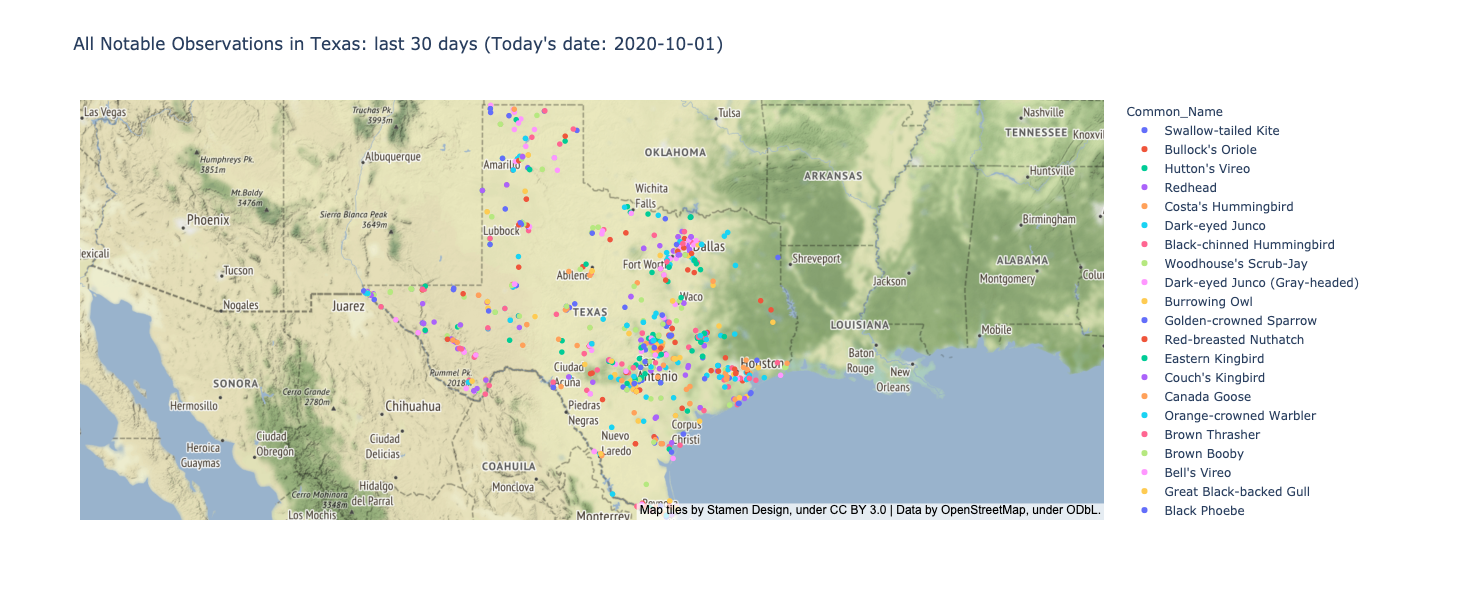

In [318]:
# mapbox_style options:
#     'open-street-map'`,
#     `'white-bg'`, `'carto-positron'`, `'carto-darkmatter'`, `'stamen-
#     terrain'`, `'stamen-toner'`, `'stamen-watercolor'`. Allowed values
#     which do require a Mapbox API token are `'basic'`, `'streets'`,
#     `'outdoors'`, `'light'`, `'dark'`, `'satellite'`, `'satellite-
#     streets'`

fig_TX_NOTABLE_OBS_df = px.scatter_mapbox(
    TX_NOTABLE_OBS_df,
    lat="lat",
    lon="lng",
    color="Common_Name",
    #     size="Bird_Count",
    hover_name="Common_Name",
    hover_data=["Bird_Count", "Date", "obsValid"],
    title=f"All Notable Observations in Texas: last {days_back_long} days (Today's date: {today})",
    mapbox_style="stamen-terrain",
    width=1000,
    height=600,
)
fig_TX_NOTABLE_OBS_df.show()


<span style="color:darkgreen">
    
### The eBird API limits the number of records that can be requested at one time to 10,000.  Therefore, it was important to define the area of interest in order to narrow the results to a reasonably-sized dataset. Texas was the obvious choice, and this map shows all observations described as "notable" over the last 30 days.
    
### With this map, one can explore the various notable bird sightings in each area of interest around Texas.  Tooltips identify the comomon name, coordinates, count, date of the observation, and the status of the validity of the observation.

In [18]:
TX_NOTABLE_OBS_df.columns


Index(['Species_Code', 'Common_Name', 'Scientific_Name', 'locId', 'locName',
       'Date', 'Bird_Count', 'lat', 'lng', 'obsValid', 'obsReviewed',
       'locationPrivate', 'subId', 'City_Code', 'City_Name', 'State_Code',
       'State_Name', 'Country_Code', 'Country_Name', 'userDisplayName',
       'obsId', 'checklistId', 'presenceNoted', 'hasComments', 'firstName',
       'lastName', 'hasRichMedia', 'evidence', 'Year', 'Month', 'Day'],
      dtype='object')

## Notable Observations - Most common species

In [8]:
name_count = TX_NOTABLE_OBS_df["Common_Name"].value_counts()
name_count_df = name_count.to_frame()
name_count_df

Common_Name
Calliope Hummingbird                       72
Red-necked Phalarope                       64
Rufous Hummingbird                         62
Sabine's Gull                              55
Woodhouse's Scrub-Jay                      49
...                                       ...
Dunlin                                      1
Black-crested Titmouse                      1
Summer Tanager                              1
White-crowned Sparrow (oriantha)            1
Great Kiskadee                              1

[321 rows x 1 columns]

In [9]:
species = name_count_df["Common_Name"].idxmax()
species

'Calliope Hummingbird'

In [10]:
TX_species_df = TX_NOTABLE_OBS_df.loc[TX_NOTABLE_OBS_df["Common_Name"] == species]
TX_species_df = TX_species_df.reset_index().drop(columns="index")
TX_species_df["Notable_Normal"] = 2
TX_species_df.head(1)

Species_Code           Common_Name       Scientific_Name    locId  \
0       calhum  Calliope Hummingbird  Selasphorus calliope  L839995   

                                locName              Date  Bird_Count  \
0  Riverpark Nature Trails (Sugar Land)  2020-09-26 16:15         1.0   

        lat        lng  obsValid  ...  presenceNoted  hasComments firstName  \
0  29.57722 -95.677732      True  ...          False        False      Jean   

     lastName hasRichMedia evidence  Year Month Day Notable_Normal  
0  Greenhalgh        False      NaN  2020     9  26              2  

[1 rows x 32 columns]

### Saving species data to CSV

In [322]:
TX_species_df.to_csv("Resources/TX_Species_Obs_eBird.csv", index=False)


In [11]:
TX_SPECIES_OBS = os.path.join("Resources", "TX_Species_Obs_eBird.csv")
TX_SPECIES_OBS_df = pd.read_csv(TX_SPECIES_OBS)

## Taxonomy of the Calliope Hummingbird

#### Calliope Hummingbird in Flight

![alt](Resources/Calliope_2.jpg)

In [324]:
TX_species_df.columns


Index(['Species_Code', 'Common_Name', 'Scientific_Name', 'locId', 'locName',
       'Date', 'Bird_Count', 'lat', 'lng', 'obsValid', 'obsReviewed',
       'locationPrivate', 'subId', 'City_Code', 'City_Name', 'State_Code',
       'State_Name', 'Country_Code', 'Country_Name', 'userDisplayName',
       'obsId', 'checklistId', 'presenceNoted', 'hasComments', 'firstName',
       'lastName', 'hasRichMedia', 'evidence', 'Year', 'Month', 'Day',
       'Notable_Normal'],
      dtype='object')

In [13]:
TX_species_df["Species_Code"][0]

'calhum'

In [14]:
species_code = TX_species_df["Species_Code"][0]

In [15]:
# Get the taxonomy for the most common observed species
url_species_taxonomy = "https://api.ebird.org/v2/ref/taxonomy/ebird"

r_species_taxonomy = requests.get(
    url_species_taxonomy,
    params={"key": api_key, "fmt": "json", "species": species_code},
)

In [16]:
r_species_taxonomy.json()

[{'sciName': 'Selasphorus calliope',
  'comName': 'Calliope Hummingbird',
  'speciesCode': 'calhum',
  'category': 'species',
  'taxonOrder': 4691.0,
  'bandingCodes': ['CAHU'],
  'comNameCodes': [],
  'sciNameCodes': ['SECA'],
  'order': 'Caprimulgiformes',
  'familyComName': 'Hummingbirds',
  'familySciName': 'Trochilidae'}]

In [18]:
species_taxonomy = pd.DataFrame(r_species_taxonomy.json())
species_taxonomy

sciName               comName speciesCode category  \
0  Selasphorus calliope  Calliope Hummingbird      calhum  species   

   taxonOrder bandingCodes comNameCodes sciNameCodes             order  \
0      4691.0       [CAHU]           []       [SECA]  Caprimulgiformes   

  familyComName familySciName  
0  Hummingbirds   Trochilidae

In [19]:
species_taxonomy = species_taxonomy.rename(
    columns={
        "order": "Order",
        "familySciName": "Family_Name",
        "comName": "Common_Name",
        "sciName": "Scientific_Name",
    }
)

In [20]:
species_taxonomy

Scientific_Name           Common_Name speciesCode category  \
0  Selasphorus calliope  Calliope Hummingbird      calhum  species   

   taxonOrder bandingCodes comNameCodes sciNameCodes             Order  \
0      4691.0       [CAHU]           []       [SECA]  Caprimulgiformes   

  familyComName  Family_Name  
0  Hummingbirds  Trochilidae

### Saving taxonomy data to CSV

In [25]:
species_taxonomy.to_csv("Resources/Species_Taxonomy.csv", index=False)

In [27]:
species_taxonomy_df = pd.read_csv("Resources/Species_Taxonomy.csv")

In [28]:
species_taxonomy_df["Family_Name"][0]

'Trochilidae'

In [29]:
TX_species_df.columns

Index(['Species_Code', 'Common_Name', 'Scientific_Name', 'locId', 'locName',
       'Date', 'Bird_Count', 'lat', 'lng', 'obsValid', 'obsReviewed',
       'locationPrivate', 'subId', 'City_Code', 'City_Name', 'State_Code',
       'State_Name', 'Country_Code', 'Country_Name', 'userDisplayName',
       'obsId', 'checklistId', 'presenceNoted', 'hasComments', 'firstName',
       'lastName', 'hasRichMedia', 'evidence', 'Year', 'Month', 'Day',
       'Notable_Normal'],
      dtype='object')

In [30]:
species_family_name = species_taxonomy_df["Family_Name"][0]

In [31]:
TX_species_df = TX_species_df.assign(Family_Name=species_family_name)

In [32]:
TX_species_df.loc[TX_species_df["obsValid"] == True]

Species_Code           Common_Name       Scientific_Name      locId  \
0        calhum  Calliope Hummingbird  Selasphorus calliope    L839995   
1        calhum  Calliope Hummingbird  Selasphorus calliope    L839995   
2        calhum  Calliope Hummingbird  Selasphorus calliope    L839995   
3        calhum  Calliope Hummingbird  Selasphorus calliope    L839995   
4        calhum  Calliope Hummingbird  Selasphorus calliope    L839995   
..          ...                   ...                   ...        ...   
64       calhum  Calliope Hummingbird  Selasphorus calliope  L12244514   
65       calhum  Calliope Hummingbird  Selasphorus calliope  L11718525   
66       calhum  Calliope Hummingbird  Selasphorus calliope  L11718525   
68       calhum  Calliope Hummingbird  Selasphorus calliope  L12226592   
71       calhum  Calliope Hummingbird  Selasphorus calliope   L5814772   

                                              locName              Date  \
0                Riverpark Nature Trails (Sugar Land)  2020-09-26 16:15   
1                Riverpark Nature Trails (Sugar Land)  2020-09-26 15:36   
2                Riverpark Nature Trails (Sugar Land)  2020-09-26 13:10   
3                Riverpark Nature Trails (Sugar Land)  2020-09-26 09:30   
4                Riverpark Nature Trails (Sugar Land)  2020-09-26 07:15   
..                                                ...               ...   
64                 Crestwood Road (private residence)  2020-09-07 14:50   
65                                          Our House  2020-09-07 09:30   
66                                          Our House  2020-09-07 09:30   
68  1505 Crestwood Rd, Austin US-TX (Private Resid...  2020-09-05 14:09   
71     Palko Home, 5505 Hillcrest, Midland, Tx. 79707  2020-09-04 15:18   

    Bird_Count        lat         lng  obsValid  ...  hasComments  firstName  \
0          1.0  29.577220  -95.677732      True  ...        False       Jean   
1          1.0  29.577220  -95.677732      True  ...        False       Mark   
2          1.0  29.577220  -95.677732      True  ...        False       Tony   
3          1.0  29.577220  -95.677732      True  ...        False       Mark   
4          1.0  29.577220  -95.677732      True  ...        False       Mark   
..         ...        ...         ...       ...  ...          ...        ...   
64         1.0  30.299469  -97.712544      True  ...        False    Suzanne   
65         1.0  26.161660  -97.794134      True  ...        False     Kristy   
66         1.0  26.161660  -97.794134      True  ...        False    William   
68         1.0  30.297931  -97.711237      True  ...        False      Caleb   
71         1.0  32.002966 -102.159163      True  ...        False       Greg   

      lastName hasRichMedia evidence  Year Month Day Notable_Normal  \
0   Greenhalgh        False      NaN  2020     9  26              2   
1   Scheuerman        False      NaN  2020     9  26              2   
2        Frank        False      NaN  2020     9  26              2   
3   Scheuerman        False      NaN  2020     9  26              2   
4   Scheuerman        False      NaN  2020     9  26              2   
..         ...          ...      ...   ...   ...  ..            ...   
64         Kho        False      NaN  2020     9   7              2   
65       Baker         True        P  2020     9   7              2   
66       Baker         True        P  2020     9   7              2   
68      Helsel         True        P  2020     9   5              2   
71       Palko         True        P  2020     9   4              2   

    Family_Name  
0   Trochilidae  
1   Trochilidae  
2   Trochilidae  
3   Trochilidae  
4   Trochilidae  
..          ...  
64  Trochilidae  
65  Trochilidae  
66  Trochilidae  
68  Trochilidae  
71  Trochilidae  

[62 rows x 33 columns]

### Mapping species-specific data

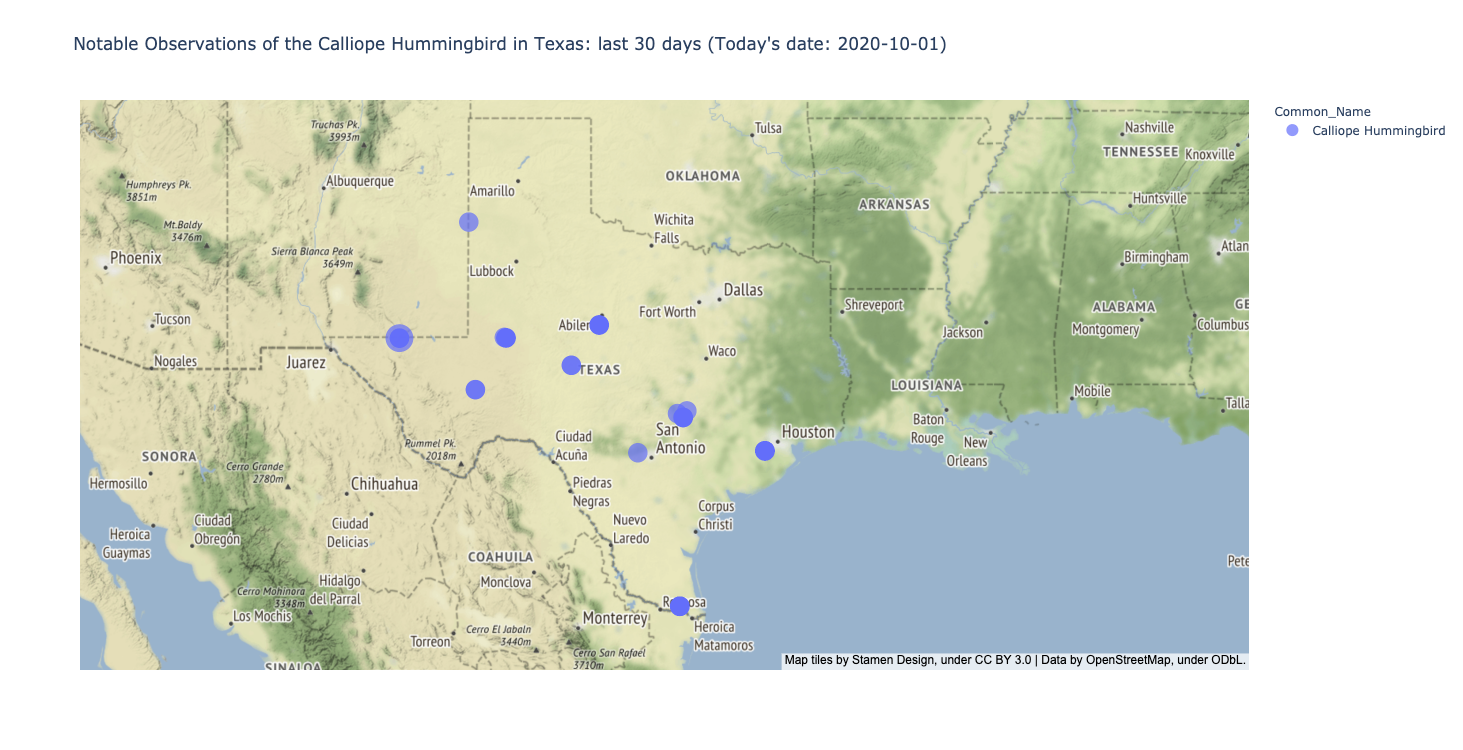

In [338]:
# Maps with plotly

fig_TX_species_df = px.scatter_mapbox(
    TX_species_df,
    lat="lat",
    lon="lng",
    color="Common_Name",
    size="Bird_Count",
    hover_name="Common_Name",
    hover_data=["Common_Name", "Family_Name", "Bird_Count", "Date"],
    title=f"Notable Observations of the {species} in Texas: last {days_back_long} days (Today's date: {today})",
    mapbox_style="stamen-terrain",
    width=1100,
    height=750,
)
fig_TX_species_df.show()


<span style="color:darkgreen">
    
### Next, the most commonly-sighted bird in the notable category in Texas was identified as the Calliope Hummingbird.  All observations of Calliope in Texas over the last 30 days are shown here.
    
### The question arises, what makes sightings of Calliope around Texas notable?  Recall the range map shown earlier...

# U.S.

### Calliope across the US - normal observations

In [40]:
# Get data for specified species observations across the US

regionCodeUS = "US"

url_US_species = (
    f"https://api.ebird.org/v2/data/obs/" + regionCodeUS + "/recent/" + species_code
)

r_US_species = requests.get(
    url_US_species, params={"key": api_key, "back": days_back_long}
)


In [41]:
r_US_species.status_code

200

In [42]:
US_species_df = pd.DataFrame(r_US_species.json())


In [43]:
US_species_df["howMany"].fillna(value=1, inplace=True)


In [44]:
US_species_df["Notable_Normal"] = 1
US_species_df


speciesCode               comName               sciName      locId  \
0        calhum  Calliope Hummingbird  Selasphorus calliope  L11047160   
1        calhum  Calliope Hummingbird  Selasphorus calliope   L7988742   
2        calhum  Calliope Hummingbird  Selasphorus calliope   L2883481   
3        calhum  Calliope Hummingbird  Selasphorus calliope    L129060   
4        calhum  Calliope Hummingbird  Selasphorus calliope    L583547   
..          ...                   ...                   ...        ...   
486      calhum  Calliope Hummingbird  Selasphorus calliope   L1285882   
487      calhum  Calliope Hummingbird  Selasphorus calliope   L3565964   
488      calhum  Calliope Hummingbird  Selasphorus calliope  L12243228   
489      calhum  Calliope Hummingbird  Selasphorus calliope  L11062523   
490      calhum  Calliope Hummingbird  Selasphorus calliope    L587297   

                                               locName             obsDt  \
0                                            Home list  2020-10-01 06:37   
1                                       Tom's Backyard  2020-09-30 18:12   
2                                        The Ice House  2020-09-30 17:38   
3                                               Portal  2020-09-30 17:27   
4           Davis Mountains Resort (Restricted Access)  2020-09-30 15:27   
..                                                 ...               ...   
486                            Los Poblanos Open Space  2020-09-02 07:00   
487  MPG Ranch--Clubhouse Floodplain (restricted ac...  2020-09-02 06:31   
488    Sequoia-Kings Canyon Wilderness--Crabtree Lakes  2020-09-02 06:25   
489         Stremciuc Residence at the Highlands US-AZ  2020-09-02 06:09   
490                                       Elden Spring  2020-09-02 05:32   

     howMany        lat         lng  obsValid  obsReviewed  locationPrivate  \
0        1.0  31.417106 -110.245284      True        False             True   
1        2.0  32.371215 -106.769178      True         True             True   
2        1.0  31.492044 -110.990056      True        False             True   
3        2.0  31.913601 -109.140800      True        False            False   
4        1.0  30.617380 -104.097004      True        False            False   
..       ...        ...         ...       ...          ...              ...   
486      1.0  35.145179 -106.657033      True        False            False   
487      1.0  46.692990 -114.044716      True        False            False   
488      1.0  36.546518 -118.327427      True        False             True   
489      1.0  33.661277 -112.201222      True         True             True   
490      1.0  35.227392 -111.604400      True        False            False   

         subId  Notable_Normal  
0    S74276679               1  
1    S74262129               1  
2    S74261962               1  
3    S74262487               1  
4    S74264939               1  
..         ...             ...  
486  S73103153               1  
487  S73103540               1  
488  S73312736               1  
489  S73099051               1  
490  S73097919               1  

[491 rows x 14 columns]

In [45]:
US_species_columns_dict = {
    "speciesCode": "Species_Code",
    "comName": "Common_Name",
    "sciName": "Scientific_Name",
    "obsDt": "Date",
    "howMany": "Bird_Count",
}

US_species_df = US_species_df.rename(columns=US_species_columns_dict)


In [46]:
pd.to_datetime(US_species_df["Date"])
US_species_df["Year"] = pd.DatetimeIndex(US_species_df["Date"]).year
US_species_df["Month"] = pd.DatetimeIndex(US_species_df["Date"]).month
US_species_df["Day"] = pd.DatetimeIndex(US_species_df["Date"]).day
US_species_df = US_species_df.assign(Family_Name=species_family_name)


In [47]:
US_species_df.columns


Index(['Species_Code', 'Common_Name', 'Scientific_Name', 'locId', 'locName',
       'Date', 'Bird_Count', 'lat', 'lng', 'obsValid', 'obsReviewed',
       'locationPrivate', 'subId', 'Notable_Normal', 'Year', 'Month', 'Day',
       'Family_Name'],
      dtype='object')

In [48]:
US_species_df = US_species_df.drop(
    columns=["locId", "locName", "obsValid", "obsReviewed", "locationPrivate"]
)
US_species_df.columns


Index(['Species_Code', 'Common_Name', 'Scientific_Name', 'Date', 'Bird_Count',
       'lat', 'lng', 'subId', 'Notable_Normal', 'Year', 'Month', 'Day',
       'Family_Name'],
      dtype='object')

In [49]:
US_species_df.to_csv("Resources/US_Species_Obs_eBird.csv", index=False)


In [33]:
US_SPECIES_OBS = os.path.join("Resources", "US_Species_Obs_eBird.csv")
US_SPECIES_OBS_df = pd.read_csv(US_SPECIES_OBS)
US_SPECIES_OBS_df.drop_duplicates()

Species_Code           Common_Name       Scientific_Name  \
0         calhum  Calliope Hummingbird  Selasphorus calliope   
1         calhum  Calliope Hummingbird  Selasphorus calliope   
2         calhum  Calliope Hummingbird  Selasphorus calliope   
3         calhum  Calliope Hummingbird  Selasphorus calliope   
4         calhum  Calliope Hummingbird  Selasphorus calliope   
..           ...                   ...                   ...   
492       calhum  Calliope Hummingbird  Selasphorus calliope   
493       calhum  Calliope Hummingbird  Selasphorus calliope   
494       calhum  Calliope Hummingbird  Selasphorus calliope   
495       calhum  Calliope Hummingbird  Selasphorus calliope   
496       calhum  Calliope Hummingbird  Selasphorus calliope   

                 Date  Bird_Count        lat         lng      subId  \
0    2020-10-01 06:37         1.0  31.417106 -110.245284  S74276679   
1    2020-09-30 18:12         2.0  32.371215 -106.769178  S74262129   
2    2020-09-30 17:38         1.0  31.492044 -110.990056  S74261962   
3    2020-09-30 17:27         2.0  31.913601 -109.140800  S74262487   
4    2020-09-30 15:27         1.0  30.617380 -104.097004  S74264939   
..                ...         ...        ...         ...        ...   
492  2020-09-01 16:15         1.0  37.316489 -107.791865  S73105765   
493  2020-09-01 16:00         1.0  35.149666 -106.685988  S73328972   
494  2020-09-01 16:00         8.0  35.652076 -105.301077  S73132202   
495  2020-09-01 15:08         2.0  31.406344 -110.314323  S73110368   
496  2020-09-01 14:58         2.0  41.839235 -103.685050  S73088916   

     Notable_Normal  Year  Month  Day  Family_Name  
0                 1  2020     10    1  Trochilidae  
1                 1  2020      9   30  Trochilidae  
2                 1  2020      9   30  Trochilidae  
3                 1  2020      9   30  Trochilidae  
4                 1  2020      9   30  Trochilidae  
..              ...   ...    ...  ...          ...  
492               1  2020      9    1  Trochilidae  
493               1  2020      9    1  Trochilidae  
494               1  2020      9    1  Trochilidae  
495               1  2020      9    1  Trochilidae  
496               1  2020      9    1  Trochilidae  

[497 rows x 13 columns]

In [34]:
TX_SPECIES_OBS_df = TX_species_df.drop(
    columns=[
        "locId",
        "locName",
        "obsValid",
        "obsReviewed",
        "locationPrivate",
        "City_Code",
        "City_Name",
        "State_Code",
        "State_Name",
        "Country_Code",
        "Country_Name",
        "userDisplayName",
        "obsId",
        "checklistId",
        "presenceNoted",
        "hasComments",
        "firstName",
        "lastName",
        "hasRichMedia",
        "evidence",
    ]
)

In [35]:
TX_SPECIES_OBS_df.columns

Index(['Species_Code', 'Common_Name', 'Scientific_Name', 'Date', 'Bird_Count',
       'lat', 'lng', 'subId', 'Year', 'Month', 'Day', 'Notable_Normal',
       'Family_Name'],
      dtype='object')

In [36]:
US_SPECIES_OBS_df.columns

Index(['Species_Code', 'Common_Name', 'Scientific_Name', 'Date', 'Bird_Count',
       'lat', 'lng', 'subId', 'Notable_Normal', 'Year', 'Month', 'Day',
       'Family_Name'],
      dtype='object')

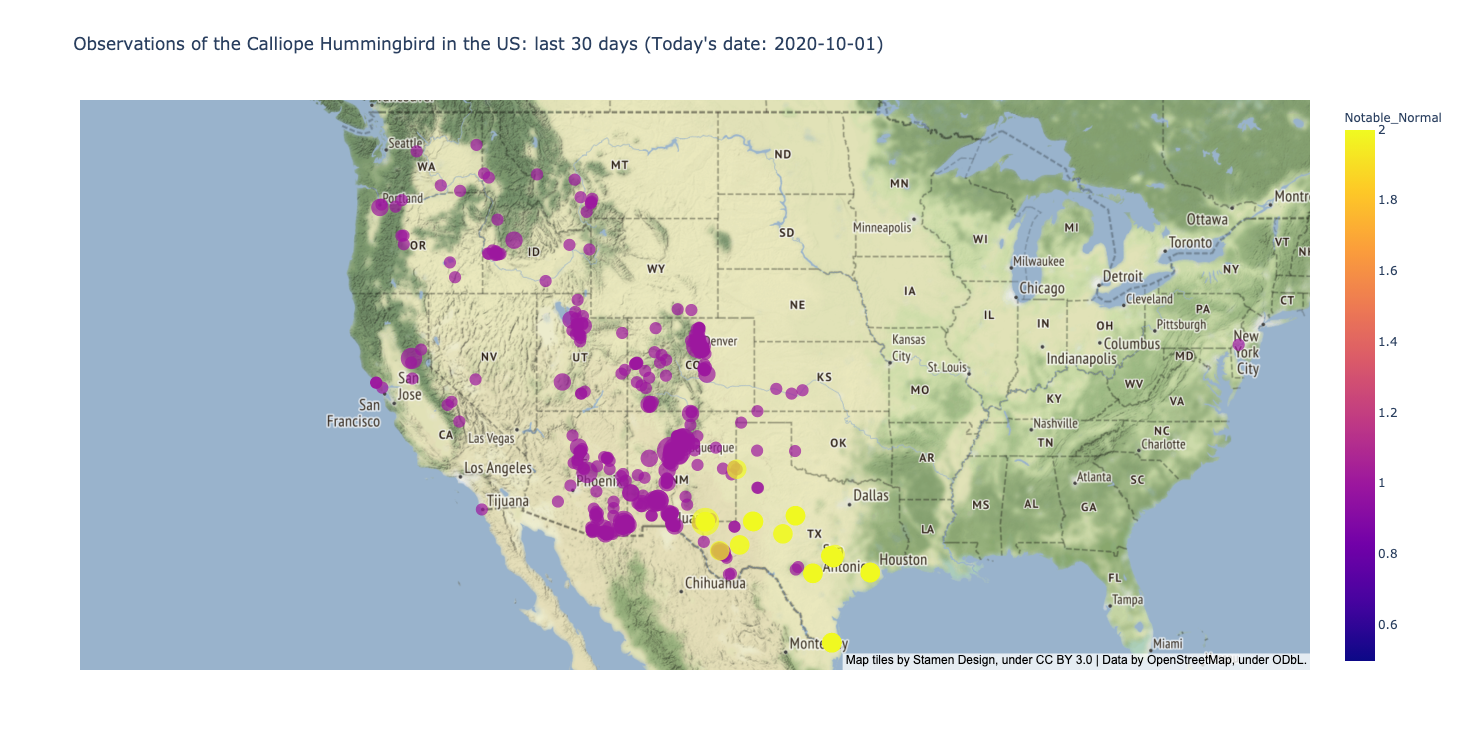

In [54]:
# US_SPECIES_OBS_df["Notable_Normal"] = US_SPECIES_OBS_df["Notable_Normal"].astype(str)    # This would be required to use color_discrete_sequence or color_discrete_map to assign discreet colors to each dataset
# TX_SPECIES_OBS_df["Notable_Normal"] = TX_SPECIES_OBS_df["Notable_Normal"].astype(str)

fig_US_SPECIES_OBS_df = px.scatter_mapbox(
    US_SPECIES_OBS_df,
    lat="lat",
    lon="lng",
    color="Notable_Normal",
    #     color_discrete_sequence="#0000FF",    # An attempt to assign discreet colors to the two different datasets
    size="Bird_Count",
    hover_name="Common_Name",
    hover_data=["Scientific_Name", "Family_Name", "Bird_Count", "Date"],
    title=f"Observations of the {species} in the US: last {days_back_long} days (Today's date: {today})",
    mapbox_style="stamen-terrain",
    width=1000,
    height=750,
)

fig_US_SPECIES_OBS_df.add_trace(
    px.scatter_mapbox(
        TX_SPECIES_OBS_df,
        lat="lat",
        lon="lng",
        color="Notable_Normal",
        #         color_discrete_sequence="#8B0000",    # An attempt to assign discreet colors to the two different datasets
        size="Bird_Count",
        hover_name="Common_Name",
        hover_data=["Scientific_Name", "Family_Name", "Bird_Count", "Date"],
    ).data[0]
)

fig_US_SPECIES_OBS_df.show()

<img src="./Resources/RangeMap_Cornell.png" alt="RANGE MAP: Calliope Hummingbird, https://ebird.org/science/status-and-trends/calhum/range-map" style="border: 1px solid darkgray" align="left" width="650px">

<span style="color:darkgreen">
<h1 align="center">Observations Outside of Normal Fall Migration Range</h3>
<h3 align="center">Calliope Hummingbird, Selasphorus calliope</h3>
    
### The notable observations are plotted on the map in yellow dots and the normal observations are in purple.  
    
### Comparing this map to the range map provided by the Cornell Ornithology Lab via eBird.org, it is clear that these observations of the Calliope Hummingbird are considered "notable" due to their distance outside of the normal and predicted range for this species during their migration south to their wintering grounds in Mexico.  Observations can be seen clustering largely in the southwestern states as we progress deeper into migration season.
    
### Range maps are constructed from a combination of scientific observations, citizen observations recorded on eBird.org, and satellite imagery which delineates natural habitats.  According to this range map, Calliope are not expected to travel over the majority of Texas, but rather their movements are typically restricted to west, or even far west, Texas as they fly south for the winter to the pine oak forests of Mexico.
    
##### Map image credit to the Cornell Lab of Ornithology, found here: https://ebird.org/science/status-and-trends/calhum/range-map

# Limitations and Future Work

### * Incorrect identification
### * Dependent on citizen scientists
### * API limit on data request volume

### * Why do these birds sometimes wander far from the normal migratory path?
### * Is there a human element impacting the movements of certain birds?
### * Cause for concern?

<span style="color:darkgreen">

## The call of the Calliope Hummingbird (audio file from All About Birds, by The Cornell Lab)

In [2]:
## Import sound dependencies
from IPython.display import Audio, display


def calliope_call():
    display(
        Audio(
            url="https://www.allaboutbirds.org/guide/assets/sound/535904.mp3",
            autoplay=True,
        )
    )


calliope_call()


<span style="color:darkgreen">

## Animation

In [37]:
US_SPECIES_OBS_df

Species_Code           Common_Name       Scientific_Name  \
0         calhum  Calliope Hummingbird  Selasphorus calliope   
1         calhum  Calliope Hummingbird  Selasphorus calliope   
2         calhum  Calliope Hummingbird  Selasphorus calliope   
3         calhum  Calliope Hummingbird  Selasphorus calliope   
4         calhum  Calliope Hummingbird  Selasphorus calliope   
..           ...                   ...                   ...   
492       calhum  Calliope Hummingbird  Selasphorus calliope   
493       calhum  Calliope Hummingbird  Selasphorus calliope   
494       calhum  Calliope Hummingbird  Selasphorus calliope   
495       calhum  Calliope Hummingbird  Selasphorus calliope   
496       calhum  Calliope Hummingbird  Selasphorus calliope   

                 Date  Bird_Count        lat         lng      subId  \
0    2020-10-01 06:37         1.0  31.417106 -110.245284  S74276679   
1    2020-09-30 18:12         2.0  32.371215 -106.769178  S74262129   
2    2020-09-30 17:38         1.0  31.492044 -110.990056  S74261962   
3    2020-09-30 17:27         2.0  31.913601 -109.140800  S74262487   
4    2020-09-30 15:27         1.0  30.617380 -104.097004  S74264939   
..                ...         ...        ...         ...        ...   
492  2020-09-01 16:15         1.0  37.316489 -107.791865  S73105765   
493  2020-09-01 16:00         1.0  35.149666 -106.685988  S73328972   
494  2020-09-01 16:00         8.0  35.652076 -105.301077  S73132202   
495  2020-09-01 15:08         2.0  31.406344 -110.314323  S73110368   
496  2020-09-01 14:58         2.0  41.839235 -103.685050  S73088916   

     Notable_Normal  Year  Month  Day  Family_Name  
0                 1  2020     10    1  Trochilidae  
1                 1  2020      9   30  Trochilidae  
2                 1  2020      9   30  Trochilidae  
3                 1  2020      9   30  Trochilidae  
4                 1  2020      9   30  Trochilidae  
..              ...   ...    ...  ...          ...  
492               1  2020      9    1  Trochilidae  
493               1  2020      9    1  Trochilidae  
494               1  2020      9    1  Trochilidae  
495               1  2020      9    1  Trochilidae  
496               1  2020      9    1  Trochilidae  

[497 rows x 13 columns]

In [38]:
TX_SPECIES_OBS_df

Species_Code           Common_Name       Scientific_Name              Date  \
0        calhum  Calliope Hummingbird  Selasphorus calliope  2020-09-26 16:15   
1        calhum  Calliope Hummingbird  Selasphorus calliope  2020-09-26 15:36   
2        calhum  Calliope Hummingbird  Selasphorus calliope  2020-09-26 13:10   
3        calhum  Calliope Hummingbird  Selasphorus calliope  2020-09-26 09:30   
4        calhum  Calliope Hummingbird  Selasphorus calliope  2020-09-26 07:15   
..          ...                   ...                   ...               ...   
67       calhum  Calliope Hummingbird  Selasphorus calliope  2020-09-07 08:59   
68       calhum  Calliope Hummingbird  Selasphorus calliope  2020-09-05 14:09   
69       calhum  Calliope Hummingbird  Selasphorus calliope  2020-09-05 13:21   
70       calhum  Calliope Hummingbird  Selasphorus calliope  2020-09-05 13:05   
71       calhum  Calliope Hummingbird  Selasphorus calliope  2020-09-04 15:18   

    Bird_Count        lat         lng      subId  Year  Month  Day  \
0          1.0  29.577220  -95.677732  S74104301  2020      9   26   
1          1.0  29.577220  -95.677732  S74111214  2020      9   26   
2          1.0  29.577220  -95.677732  S74093310  2020      9   26   
3          1.0  29.577220  -95.677732  S74074720  2020      9   26   
4          1.0  29.577220  -95.677732  S74072172  2020      9   26   
..         ...        ...         ...        ...   ...    ...  ...   
67         1.0  31.412724 -100.492746  S73300370  2020      9    7   
68         1.0  30.297931  -97.711237  S73225014  2020      9    5   
69         1.0  30.894155 -102.878718  S73219442  2020      9    5   
70         1.0  30.893549 -102.878588  S73278585  2020      9    5   
71         1.0  32.002966 -102.159163  S73183421  2020      9    4   

    Notable_Normal  Family_Name  
0                2  Trochilidae  
1                2  Trochilidae  
2                2  Trochilidae  
3                2  Trochilidae  
4                2  Trochilidae  
..             ...          ...  
67               2  Trochilidae  
68               2  Trochilidae  
69               2  Trochilidae  
70               2  Trochilidae  
71               2  Trochilidae  

[72 rows x 13 columns]

In [45]:
frames = [US_SPECIES_OBS_df, TX_SPECIES_OBS_df]
result_df = pd.concat(frames)
result_df

Species_Code           Common_Name       Scientific_Name              Date  \
0        calhum  Calliope Hummingbird  Selasphorus calliope  2020-10-01 06:37   
1        calhum  Calliope Hummingbird  Selasphorus calliope  2020-09-30 18:12   
2        calhum  Calliope Hummingbird  Selasphorus calliope  2020-09-30 17:38   
3        calhum  Calliope Hummingbird  Selasphorus calliope  2020-09-30 17:27   
4        calhum  Calliope Hummingbird  Selasphorus calliope  2020-09-30 15:27   
..          ...                   ...                   ...               ...   
67       calhum  Calliope Hummingbird  Selasphorus calliope  2020-09-07 08:59   
68       calhum  Calliope Hummingbird  Selasphorus calliope  2020-09-05 14:09   
69       calhum  Calliope Hummingbird  Selasphorus calliope  2020-09-05 13:21   
70       calhum  Calliope Hummingbird  Selasphorus calliope  2020-09-05 13:05   
71       calhum  Calliope Hummingbird  Selasphorus calliope  2020-09-04 15:18   

    Bird_Count        lat         lng      subId  Notable_Normal  Year  Month  \
0          1.0  31.417106 -110.245284  S74276679               1  2020     10   
1          2.0  32.371215 -106.769178  S74262129               1  2020      9   
2          1.0  31.492044 -110.990056  S74261962               1  2020      9   
3          2.0  31.913601 -109.140800  S74262487               1  2020      9   
4          1.0  30.617380 -104.097004  S74264939               1  2020      9   
..         ...        ...         ...        ...             ...   ...    ...   
67         1.0  31.412724 -100.492746  S73300370               2  2020      9   
68         1.0  30.297931  -97.711237  S73225014               2  2020      9   
69         1.0  30.894155 -102.878718  S73219442               2  2020      9   
70         1.0  30.893549 -102.878588  S73278585               2  2020      9   
71         1.0  32.002966 -102.159163  S73183421               2  2020      9   

    Day  Family_Name  
0     1  Trochilidae  
1    30  Trochilidae  
2    30  Trochilidae  
3    30  Trochilidae  
4    30  Trochilidae  
..  ...          ...  
67    7  Trochilidae  
68    5  Trochilidae  
69    5  Trochilidae  
70    5  Trochilidae  
71    4  Trochilidae  

[569 rows x 13 columns]

In [57]:
results_clean_df = result_df.groupby(["subId"])["Notable_Normal"].max()

In [39]:
US_SPECIES_OBS_df["subId"][0]

'S74276679'

In [40]:
US_Notables = list(US_SPECIES_OBS_df["subId"])
US_Notables

['S74276679',
 'S74262129',
 'S74261962',
 'S74262487',
 'S74264939',
 'S74253006',
 'S74262961',
 'S74252224',
 'S74237325',
 'S74246757',
 'S74228818',
 'S74215516',
 'S74232217',
 'S74206862',
 'S74219835',
 'S74205019',
 'S74192365',
 'S74192560',
 'S74186016',
 'S74264908',
 'S74260208',
 'S74212192',
 'S74174909',
 'S74172400',
 'S74166578',
 'S74181753',
 'S74175452',
 'S74166598',
 'S74176911',
 'S74139624',
 'S74120070',
 'S74122202',
 'S74124616',
 'S74122711',
 'S74118511',
 'S74170738',
 'S74146712',
 'S74100992',
 'S74104301',
 'S74107853',
 'S74103333',
 'S74125703',
 'S74103221',
 'S74081067',
 'S74103045',
 'S74075872',
 'S74103185',
 'S74101103',
 'S74073568',
 'S74056838',
 'S74228592',
 'S74045994',
 'S74032972',
 'S74038244',
 'S74032682',
 'S74032084',
 'S74020283',
 'S74015007',
 'S74016559',
 'S74012185',
 'S74012958',
 'S74031434',
 'S73999737',
 'S74002693',
 'S73999354',
 'S73982396',
 'S73984870',
 'S73988079',
 'S73997360',
 'S73957744',
 'S73961486',
 'S739

In [41]:
TX_Notables = list(TX_SPECIES_OBS_df["subId"])
TX_Notables

['S74104301',
 'S74111214',
 'S74093310',
 'S74074720',
 'S74072172',
 'S74057626',
 'S74048410',
 'S74057612',
 'S73999737',
 'S74009986',
 'S73992576',
 'S73975378',
 'S73974261',
 'S73984661',
 'S73990276',
 'S73978127',
 'S73965814',
 'S73969037',
 'S73977778',
 'S73967200',
 'S73955393',
 'S73952754',
 'S73920721',
 'S73902253',
 'S73878467',
 'S73871974',
 'S73820080',
 'S73834970',
 'S73733198',
 'S73718103',
 'S73718102',
 'S73699126',
 'S73665752',
 'S73650925',
 'S73650926',
 'S73787846',
 'S73791965',
 'S73788380',
 'S73648841',
 'S73650526',
 'S73613655',
 'S73559707',
 'S73613683',
 'S73509386',
 'S73476396',
 'S73476421',
 'S73544880',
 'S73446324',
 'S73426547',
 'S73424959',
 'S73440312',
 'S73412439',
 'S73440336',
 'S73408198',
 'S73396300',
 'S73399764',
 'S73401069',
 'S73385980',
 'S73398255',
 'S73356402',
 'S73356360',
 'S73362805',
 'S73363717',
 'S73321899',
 'S73319563',
 'S73329171',
 'S73362663',
 'S73300370',
 'S73225014',
 'S73219442',
 'S73278585',
 'S731

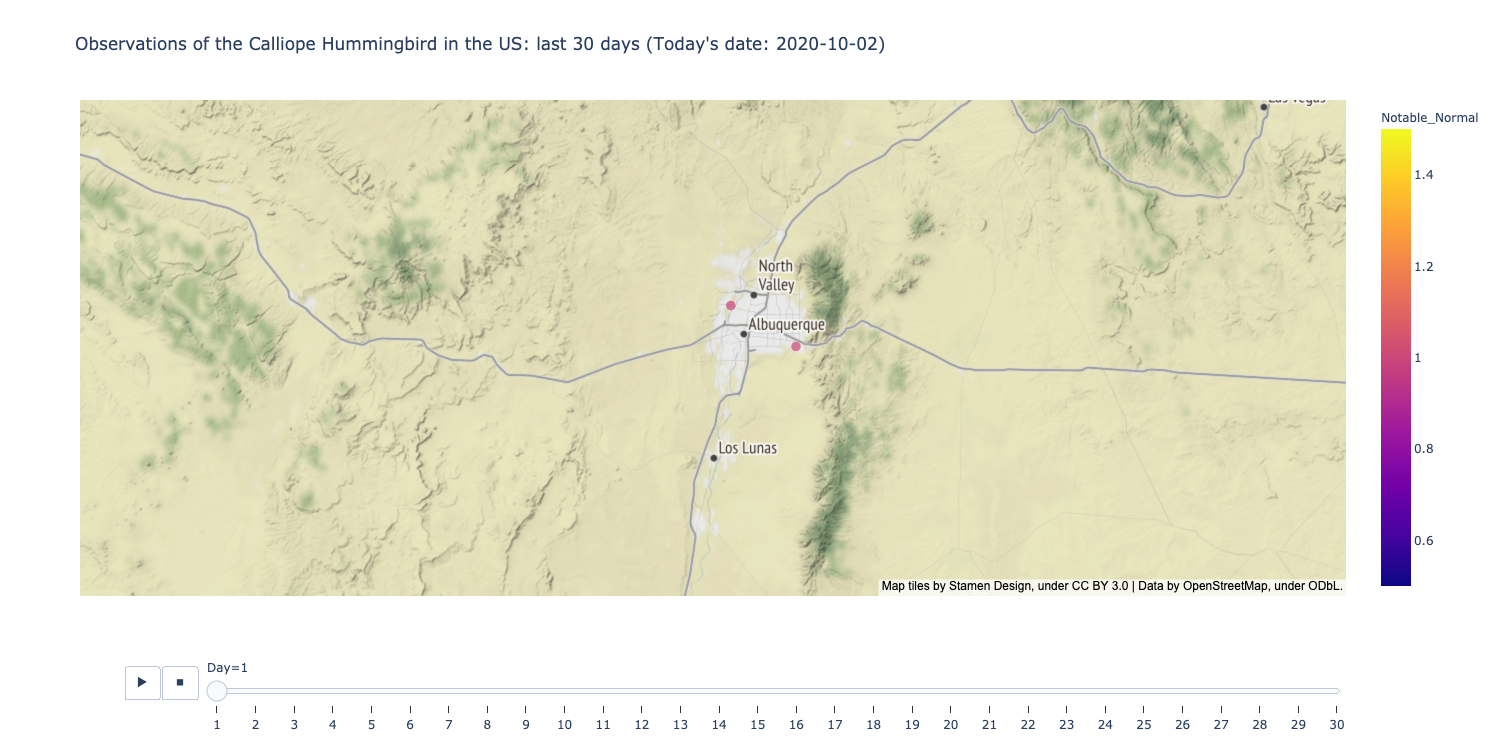

In [58]:
# species_plot = df_species_US.loc[df_species_US["comName"] == f"{species}"]

# Covering US for full 30 days and especially for a single species won't work because you're limited to 10k records. Could be missing a large portion of data.

# US_SPECIES_OBS_df["Notable_Normal"] = US_SPECIES_OBS_df["Notable_Normal"].astype(int)
# TX_SPECIES_OBS_df["Notable_Normal"] = TX_SPECIES_OBS_df["Notable_Normal"].astype(int)

results_clean_df = result_df.sort_values(by=["Day"], ignore_index=True)

fig_result_df_animate = px.scatter_mapbox(
    results_clean_df,
    lat="lat",
    lon="lng",
    color="Notable_Normal",
    #     color_discrete_sequence="#0000FF",
    size="Bird_Count",
    hover_name="Common_Name",
    hover_data=["Scientific_Name", "Family_Name", "Bird_Count", "Date"],
    title=f"Observations of the {species} in the US: last {days_back_long} days (Today's date: {today})",
    mapbox_style="stamen-terrain",
    width=1000,
    height=750,
    animation_frame="Day",
)

fig_result_df_animate.show()

## Notes:
### Data cleaning: 
#### * Renamed columns
#### * Dropped duplicate rows
#### * Dropped unneeded columns
#### * From Date column, created new columns Year, Month, Day, and US_State.
#### * Used .fillna(1) for rows with missing Bird Count data. Filled with a value of "1" since the observation wouldn't have been recorded if there were 0 birds. Also, most observations were of 1 bird.

### Data Sources:
#### * eBird: pulled data from the Notable Observations endpoint and the Taxonomy endpoint. From the Taxonomy data, added the specie's family name to the working dataframe to add to the tooltips on the maps.
#### * Calliope Hummingbird call: https://www.allaboutbirds.org/guide/Calliope_Hummingbird/sounds
#### * WhatBird.com: Range map
#### * Range Map from Cornell Lab of Ornithology (https://birdsoftheworld.org/bow/species/calhum/cur/introduction)